# Example: Bayesian Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

#### Running the code for a given number of chains and epochs

In [2]:
num_chains = 1
num_epochs = 10000

In [3]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering_bnn.py {num_epochs}

acceptance for temp=1: 48.44%, exchange: 0.00%
Total time: 15.571666955947876


In [4]:
all_values = np.zeros(shape=(num_chains, num_epochs, 286))
all_energies = np.zeros(shape=(num_chains, num_epochs))

for i in range(num_chains):
    data = np.load(f'results/bnn_single_15_2/process_{i}.npy', allow_pickle=True)
    values = data[:,0]
    energy = data[:,1]
    values = np.array([val[0] for val in values])
    all_values[i] = values
    all_energies[i] = energy
    
print(all_values.shape, all_energies.shape)

(1, 10000, 286) (1, 10000)


#### Plotting the results

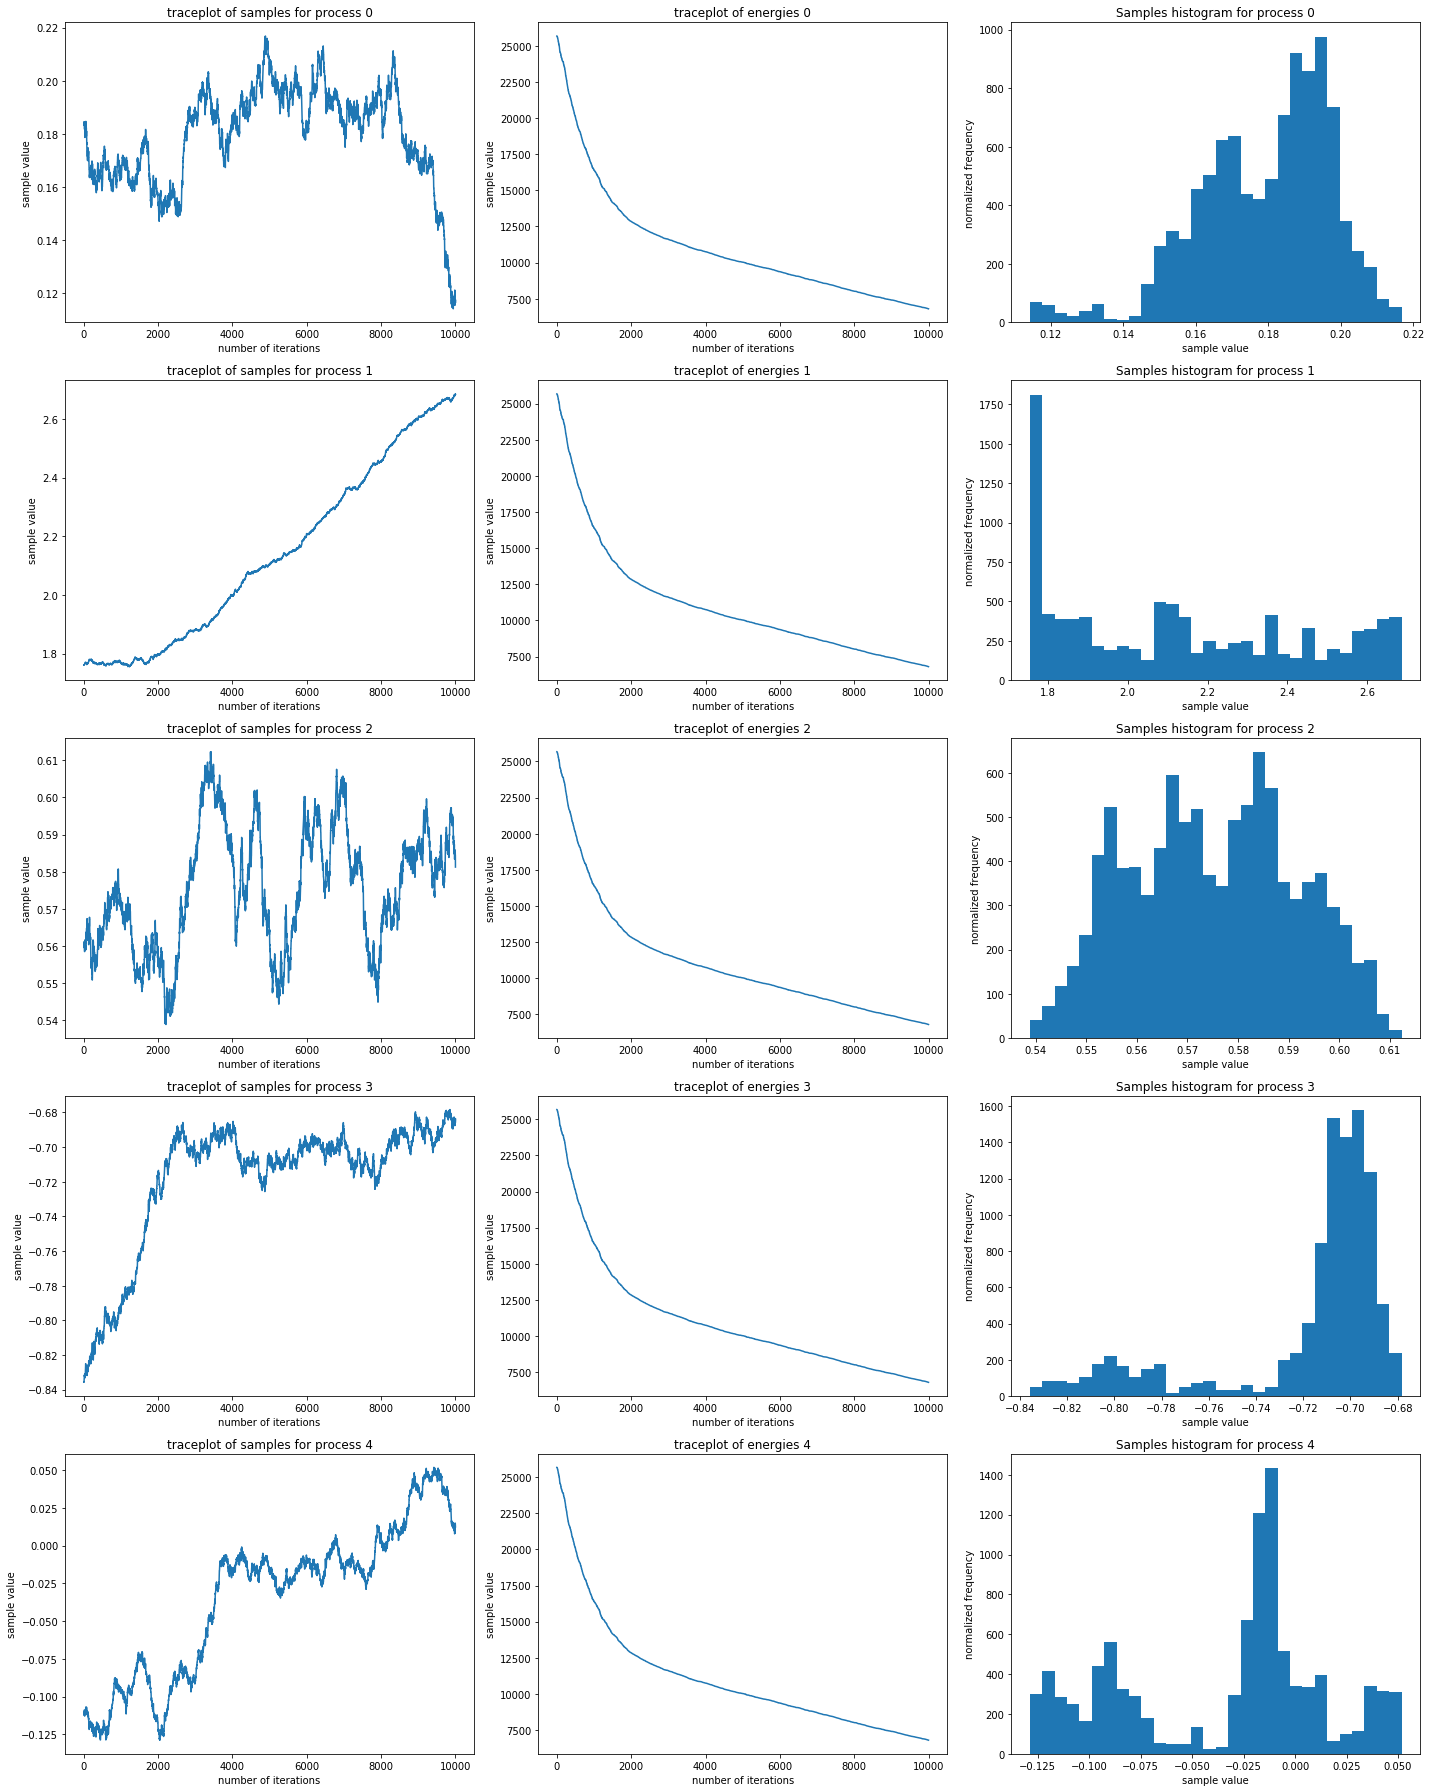

In [5]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,5*5))
ax = ax.ravel()

for i in range(5):
    ax[3*i+0].plot(range(num_epochs), all_values[0][:,i])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')
    
    ax[3*i+1].plot(range(num_epochs), all_energies[0])
    ax[3*i+1].set_title(f'traceplot of energies {i}')
    ax[3*i+1].set_ylabel('sample value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(all_values[0][:,i], bins=30, density=False)
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
fig.tight_layout()

(100, 1000)
(1000,)


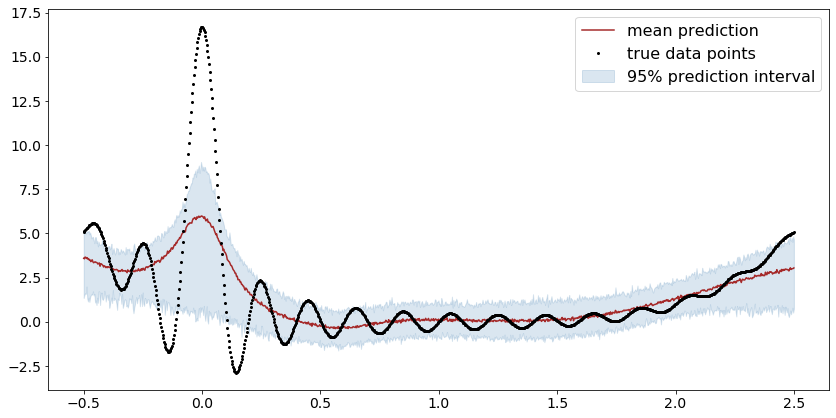

In [6]:
fig, ax = plt.subplots(figsize=(14,7))

posterior_predictive = np.load(f'results/posterior_predictive.npy')

def gramacy_lee_1d(x):
    return np.sin(10*np.pi*x)/(2*x) + (x-1)**4

xmin = -0.5
xmax = 2.5
num_pts = 1000

x_test = np.linspace(xmin, xmax, num_pts)
y_test = gramacy_lee_1d(x_test)

print(posterior_predictive.shape)

y_pred = np.mean(posterior_predictive, axis=0)
pct_025 = np.percentile(posterior_predictive, 2.5, axis=0)
pct_975 = np.percentile(posterior_predictive, 97.5, axis=0)

print(pct_025.shape)
ax.fill_between(x_test, pct_975, pct_025, color='steelblue', alpha=0.2, label='95% prediction interval')
ax.plot(x_test, y_pred, color='brown', alpha=1, label='mean prediction')
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.plot(x_test, y_test, 'o', color='black', alpha=1, markersize=2, label='true data points')
ax.legend(fontsize=16)
plt.savefig(f'figures/bnn_single_15_2', bbox_inches='tight');

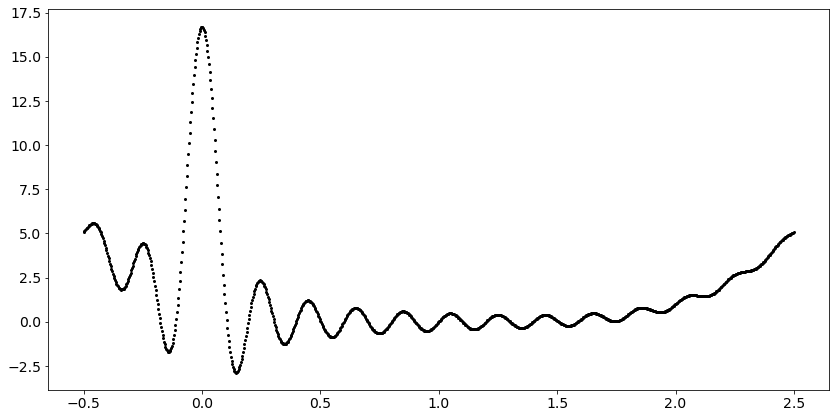

In [8]:
fig, ax = plt.subplots(figsize=(14,7))

posterior_predictive = np.load(f'results/posterior_predictive.npy')

def gramacy_lee_1d(x):
    return np.sin(10*np.pi*x)/(2*x) + (x-1)**4

xmin = -0.5
xmax = 2.5
num_pts = 1000

x_test = np.linspace(xmin, xmax, num_pts)
y_test = gramacy_lee_1d(x_test)

y_pred = np.mean(posterior_predictive, axis=0)
pct_025 = np.percentile(posterior_predictive, 2.5, axis=0)
pct_975 = np.percentile(posterior_predictive, 97.5, axis=0)

# ax.fill_between(x_test, pct_975, pct_025, color='steelblue', alpha=0.2, label='95% prediction interval')
# ax.plot(x_test, y_pred, color='brown', alpha=1, label='mean prediction')
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.plot(x_test, y_test, 'o', color='black', alpha=1, markersize=2, label='true data points')
# ax.legend(fontsize=16)
plt.savefig(f'figures/gramacy_lee', bbox_inches='tight');

In [7]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred=y_pred, y_true=y_test)

4.779011623054473

---